In [1]:
#install.packages("tidyverse")
#install.packages("ggrepel")
library('ggrepel')
library('tidyverse')

Loading required package: ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df = read_csv("rpd.csv")
#head(df)
df %>% filter(month.day=="8/13")

Rows: 3359 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): time_corr, month.day
dbl  (10): Mileage, pace_min, Year, Month, Day, numRun, highest, rpd, firstR...
date  (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010-08-13,6.06,NA,NA,2010,8,13,8/13,1,0,1,1,1
2012-08-13,7.07,0:53:02,7.501179,2012,8,13,8/13,2,0,1,1,2
2013-08-13,1.70,0:14:10,8.333333,2013,8,13,8/13,3,0,1,1,3
2013-08-13,4.64,0:31:50,6.860632,2013,8,13,8/13,4,0,2,0,3
2014-08-13,7.20,1:03:13,8.780093,2014,8,13,8/13,5,0,1,1,4
2015-08-13,6.04,0:45:32,7.538631,2015,8,13,8/13,6,0,1,1,5
2015-08-13,1.86,0:10:09,5.456989,2015,8,13,8/13,7,0,2,0,5
2016-08-13,12.60,1:41:23,8.046296,2016,8,13,8/13,8,0,1,1,6
2017-08-13,15.25,1:49:54,7.206557,2017,8,13,8/13,9,0,1,1,7


In [3]:
dfh = df %>%
    filter(highest==1)
head(dfh)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024-01-01,3.11,0:23:16,7.481243,2024,1,1,1/1,10,1,1,1,10
2022-01-02,7.07,0:51:00,7.213579,2022,1,2,1/2,6,1,1,1,6
2023-01-03,6.43,0:47:02,7.314671,2023,1,3,1/3,8,1,1,1,7
2021-01-04,7.00,0:53:48,7.685714,2021,1,4,1/4,7,1,1,1,7
2024-01-05,3.11,0:21:22,6.870311,2024,1,5,1/5,11,1,1,1,11
2023-01-06,9.08,1:06:09,7.285242,2023,1,6,1/6,7,1,1,1,7


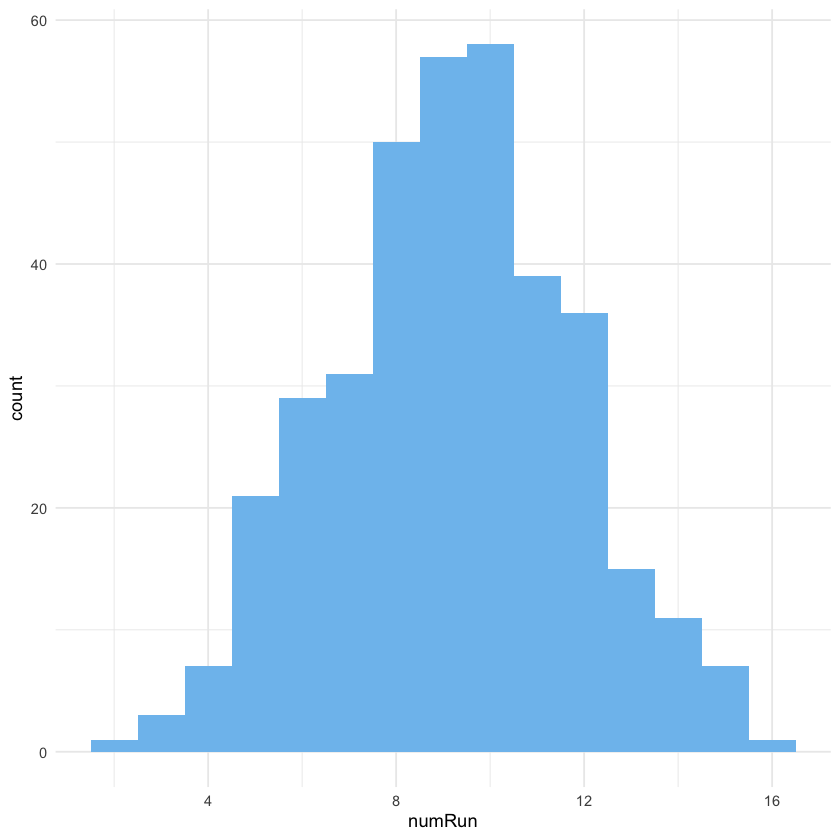

In [4]:
p = ggplot(dfh, aes(x=numRun)) +
    geom_histogram(binwidth=1, fill="skyblue2") +
    theme_minimal()
p

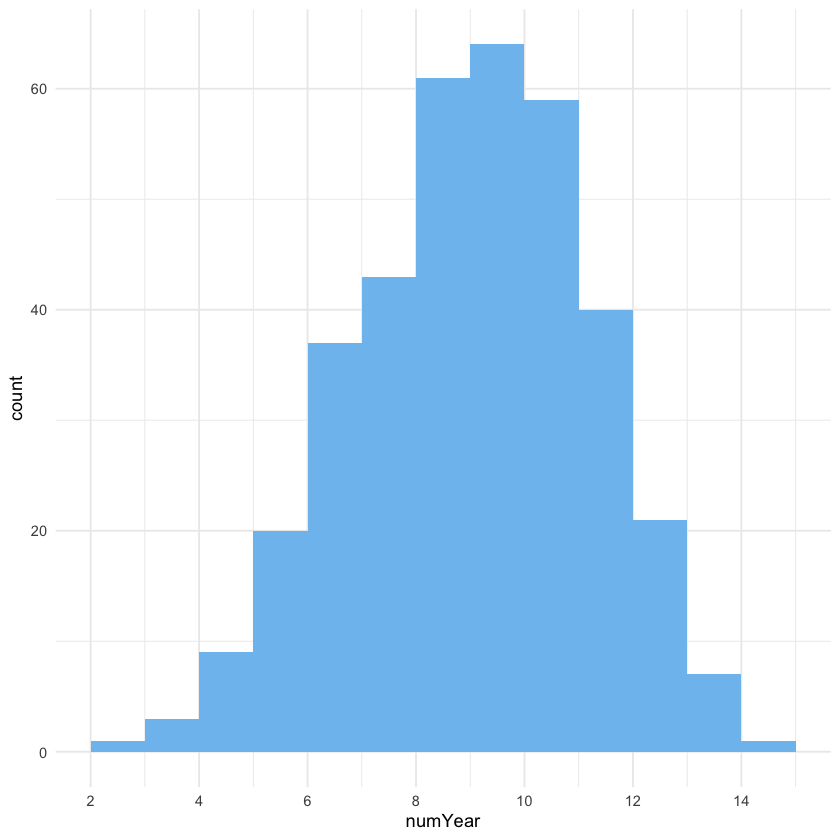

In [5]:
p2 = ggplot(dfh, aes(x=numYear)) +
    geom_histogram(binwidth=1, fill="skyblue2") +
    theme_minimal() +
    scale_x_continuous(breaks=c(-0.5,1.5,3.5,5.5,7.5,9.5,11.5,13.5),labels=c(0,2,4,6,8,10,12,14))
p2

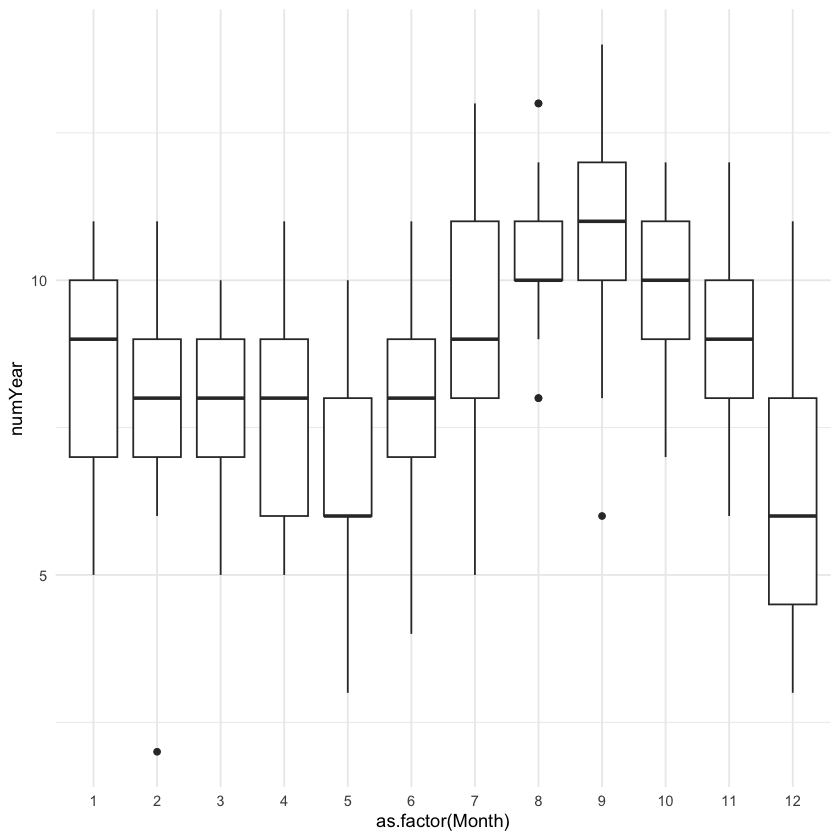

In [6]:
p3 = ggplot(dfh, aes(x=as.factor(Month), y=numYear)) +
    geom_boxplot() +
    theme_minimal()
p3

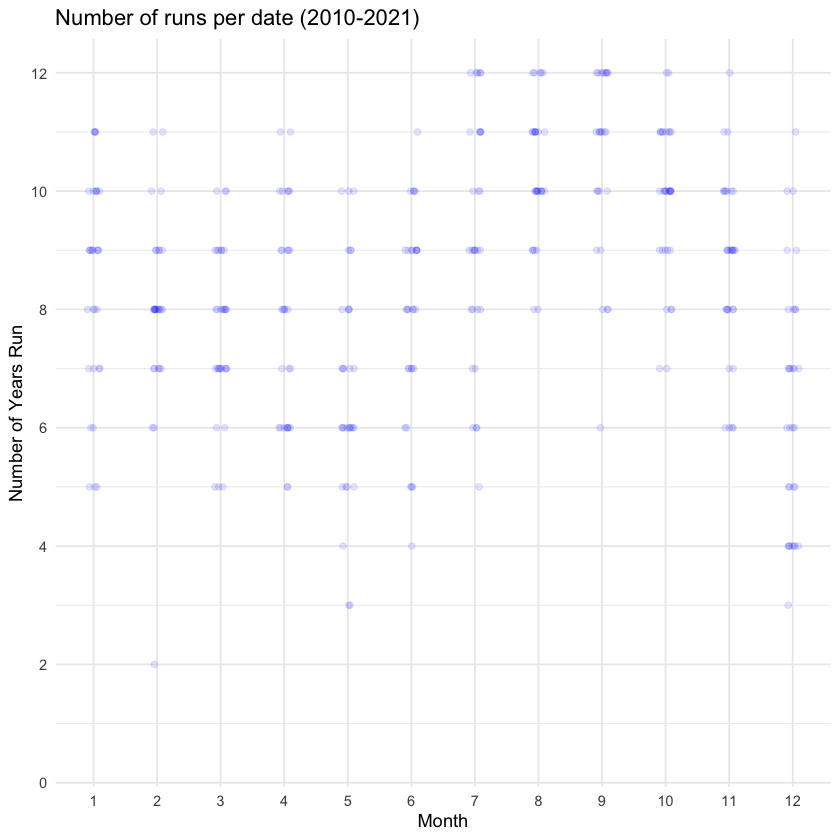

In [7]:
p3 = ggplot(dfh, aes(x=as.factor(Month), y=numYear)) +
    geom_point(position = position_jitter(h=0,w=0.1), color="blue", alpha=.1) +
    theme_minimal() +
    scale_y_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12)) +
    coord_cartesian(ylim = c(0.5,12)) +
    ggtitle("Number of runs per date (2010-2021)") +
    labs(x="Month",y="Number of Years Run")
p3

In [8]:
dfh %>%
    mutate(Date1 = paste(Month,"/",Day, sep="")) %>%
    group_by(Month) %>%
    select("Month","Date1","numYear") %>%
    arrange(numYear) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

Month,Date1,numYear,rk
<dbl>,<chr>,<dbl>,<int>
2,2/29,2,1
5,5/23,3,1
12,12/8,3,1
6,6/2,4,1
1,1/7,5,1
3,3/19,5,1
4,4/2,5,1
7,7/10,5,1
9,9/14,6,1


In [9]:
dfh %>%
    mutate(Date1 = paste(Month,"/",Day, sep="")) %>%
    group_by(Month) %>%
    select("Month","Date1","numYear") %>%
    arrange(-numYear) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

Month,Date1,numYear,rk
<dbl>,<chr>,<dbl>,<int>
9,9/6,14,1
7,7/20,13,1
8,8/19,13,1
10,10/2,12,1
11,11/23,12,1
1,1/5,11,1
2,2/8,11,1
4,4/1,11,1
6,6/29,11,1


In [10]:
YTD <- function(df1, DateOrder, Month, Day){
df1 %>%
    mutate(DateOrder =
           ifelse(Month==1, Day,
                  ifelse(Month==2, 31+Day,
                         ifelse(Month==3, 60+Day,
                                ifelse(Month==4, 91+Day,
                                       ifelse(Month==5, 121+Day,
                                              ifelse(Month==6, 152+Day,
                                                     ifelse(Month==7, 182+Day,
                                                            ifelse(Month==8, 213+Day,
                                                                   ifelse(Month==9, 244+Day,
                                                                          ifelse(Month==10, 274+Day,
                                                                                 ifelse(Month==11, 305+Day,
                                                                                        ifelse(Month==12, 335+Day, NA
                                                                                               )))))))))))))
}

In [11]:
dfd <- YTD(df1=dfh, DateOrder=DateOrder, Month=Month, Day=Day)
tail(dfd)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-12-26,6.69,0:58:11,8.697060,2022,12,26,12/26,7,1,1,1,7,361
2020-12-27,8.41,0:58:44,6.983750,2020,12,27,12/27,6,1,1,1,6,362
2022-12-28,6.59,0:48:41,7.387456,2022,12,28,12/28,7,1,1,1,7,363
2018-12-29,2.87,NA,NA,2018,12,29,12/29,5,1,1,1,5,364
2022-12-30,5.00,0:40:26,8.086667,2022,12,30,12/30,9,1,1,1,9,365
2020-12-31,6.00,0:44:49,7.469444,2020,12,31,12/31,4,1,1,1,4,366


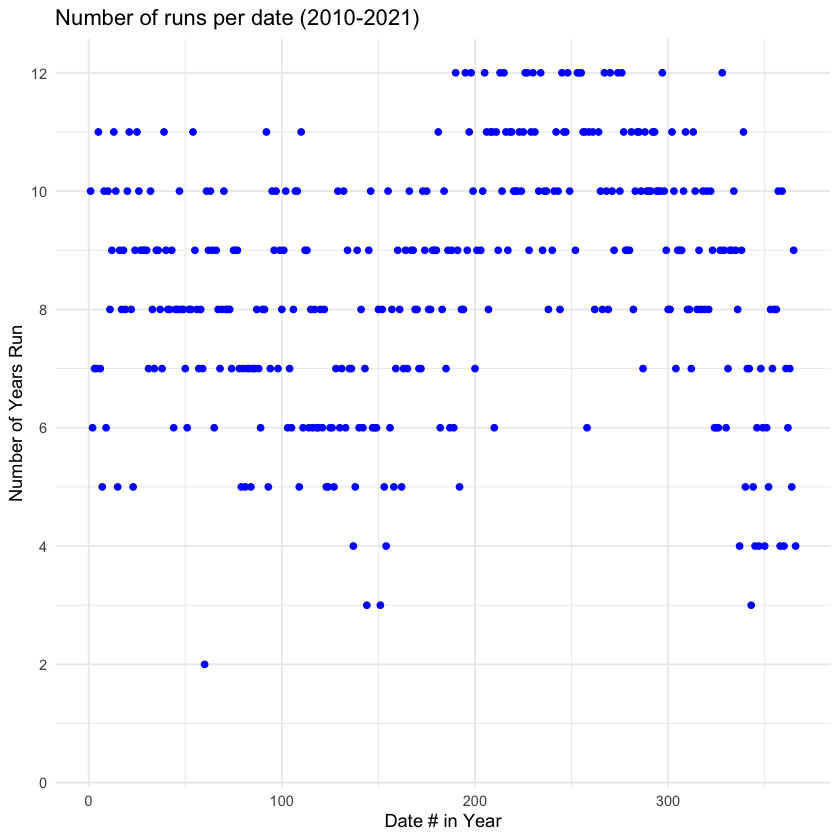

In [12]:
p4 = ggplot(dfd, aes(x=DateOrder, y=numYear)) +
    geom_point(color="blue") +
    theme_minimal() +
    scale_y_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12)) +
    coord_cartesian(ylim = c(0.5,12)) +
    ggtitle("Number of runs per date (2010-2021)") +
    labs(x="Date # in Year",y="Number of Years Run")
p4

In [13]:
df2 <- YTD(df, DateOrder, Month, Day)
# head(df2)
tail(df2)
#df2

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-12-30,7.50,0:52:15,6.966667,2020,12,30,12/30,8,0,1,1,8,365
2022-12-30,5.00,0:40:26,8.086667,2022,12,30,12/30,9,1,1,1,9,365
2015-12-31,5.55,0:38:47,6.987988,2015,12,31,12/31,1,0,1,1,1,366
2016-12-31,5.37,0:42:46,7.963998,2016,12,31,12/31,2,0,1,1,2,366
2017-12-31,7.00,0:51:16,7.323810,2017,12,31,12/31,3,0,1,1,3,366
2020-12-31,6.00,0:44:49,7.469444,2020,12,31,12/31,4,1,1,1,4,366


In [14]:
df2s <- df2 %>%
    group_by(DateOrder) %>%
    summarize(SumMi = sum(Mileage))
tail(df2s)

DateOrder,SumMi
<dbl>,<dbl>
361,44.34
362,41.13
363,40.84
364,24.67
365,47.27
366,23.92


In [15]:
df2d <- full_join(dfd, df2s, by="DateOrder") %>%
    mutate(numYear_cat = ifelse(numYear<(max(numYear)-9),"less",numYear)) %>%
    mutate(numYear_cat = fct_relevel(numYear_cat, c("less","4","5","6","7","8","9")))
#df2d
tail(df2d,20)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `numYear_cat = fct_relevel(numYear_cat, c("less", "4", "5", "6",
  "7", "8", "9"))`.
Caused by warning:
! 1 unknown level in `f`: 4”


Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder,SumMi,numYear_cat
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2019-12-12,6.51,0:46:36,7.158218,2019,12,12,12/12,4,1,1,1,4,347,23.01,less
2023-12-13,7.00,0:53:32,7.647619,2023,12,13,12/13,8,1,1,1,7,348,37.94,7
2023-12-14,8.05,0:55:27,6.888199,2023,12,14,12/14,7,1,1,1,6,349,39.46,6
2018-12-15,10.00,NA,NA,2018,12,15,12/15,4,1,1,1,4,350,23.73,less
2023-12-16,0.21,0:1:49,8.650794,2023,12,16,12/16,7,1,2,0,6,351,35.94,6
2021-12-17,6.00,0:42:48,7.133333,2021,12,17,12/17,5,1,1,1,5,352,26.59,5
2023-12-18,6.18,0:44:45,7.241100,2023,12,18,12/18,8,1,1,1,8,353,44.48,8
2021-12-19,10.22,1:11:18,6.976517,2021,12,19,12/19,7,1,1,1,7,354,40.61,7
2022-12-20,4.06,0:33:19,8.206076,2022,12,20,12/20,10,1,1,1,8,355,40.72,8


In [16]:
df2e <- df2d %>%
    mutate(MMDD = paste(Month,"/",Day, sep="")) %>%
    select("MMDD","Month","Day","DateOrder","numYear","numYear_cat","SumMi")
tail(df2e)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
12/26,12,26,361,7,7,44.34
12/27,12,27,362,6,6,41.13
12/28,12,28,363,7,7,40.84
12/29,12,29,364,5,5,24.67
12/30,12,30,365,9,9,47.27
12/31,12,31,366,4,less,23.92


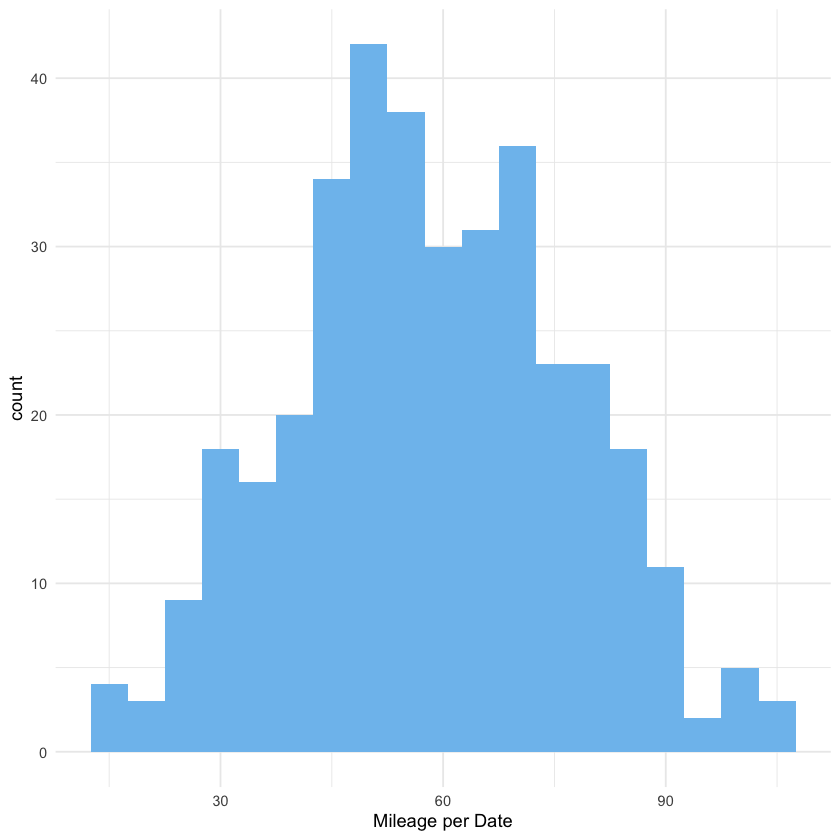

In [17]:
p5 = ggplot(df2d, aes(x=SumMi)) +
    geom_histogram(fill="skyblue2", binwidth=5) +
    theme_minimal() +
    labs(x="Mileage per Date")
p5

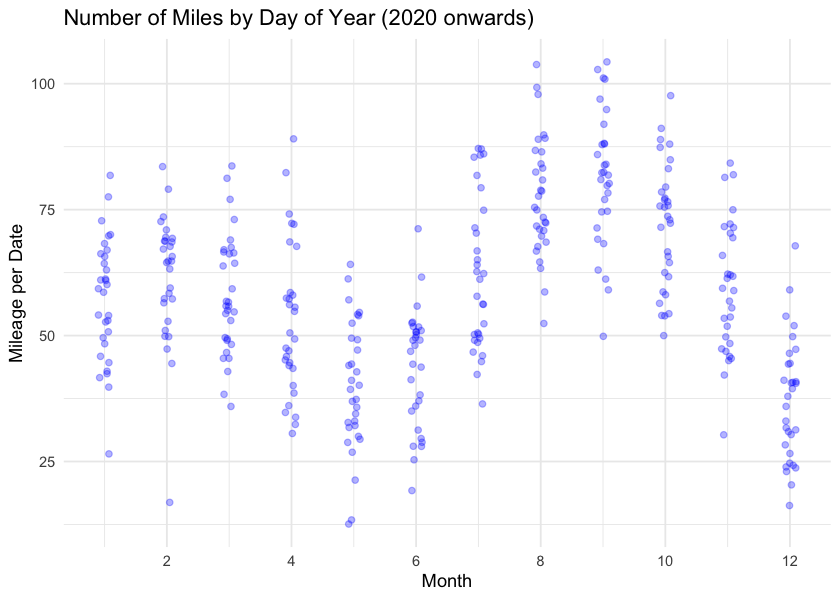

In [18]:
options(repr.plot.width=7, repr.plot.height=5)
p6 = ggplot(df2d, aes(x=Month,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Month",y="Mileage per Date",title="Number of Miles by Day of Year (2020 onwards)") +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p6

In [19]:
df2o <- df2e %>%
    mutate(szn = ifelse(Month<=3,1,
                        ifelse(Month<=6,2,
                               ifelse(Month<=9,3,4)))) %>%
    group_by(szn) %>%
    mutate(minmaxszn = ifelse(SumMi==min(SumMi) | SumMi==max(SumMi),1,0)) %>%
    ungroup() %>%
    filter(minmaxszn==1) %>%
    # This mutate function will need to be updated whenever a new date meets the above criteria
    # Preferably, it should be automated better at some point
    mutate(Mon_DD = c("Feb 29","Mar 1","Apr 1","May 23","Jul 5","Aug 13","Oct 2","Dec 8"))
df2o

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi,szn,minmaxszn,Mon_DD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
2/29,2,29,60,2,less,16.88,1,1,Feb 29
3/1,3,1,61,10,10,83.67,1,1,Mar 1
4/1,4,1,92,11,11,89.05,2,1,Apr 1
5/23,5,23,144,3,less,12.59,2,1,May 23
7/5,7,5,187,6,6,36.43,3,1,Jul 5
9/11,9,11,255,12,12,104.33,3,1,Aug 13
10/2,10,2,276,12,12,97.63,4,1,Oct 2
12/8,12,8,343,3,less,16.26,4,1,Dec 8


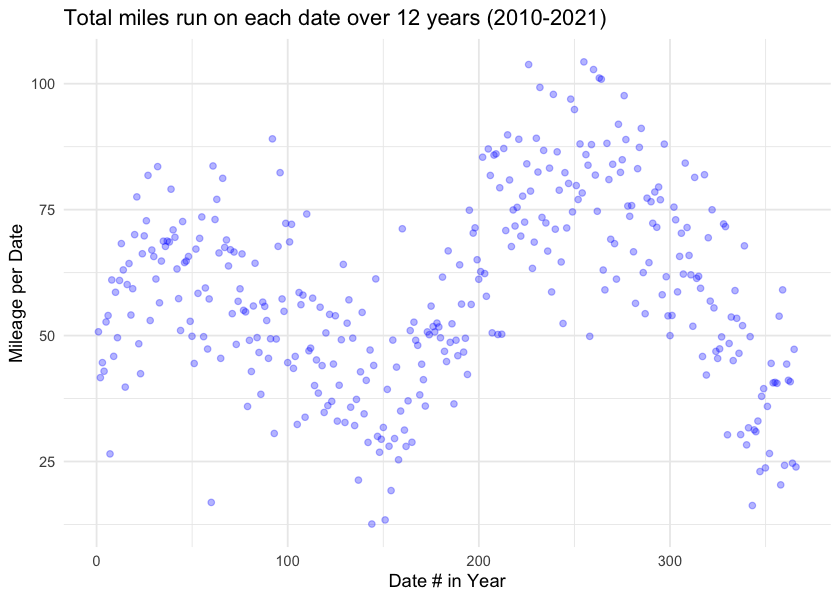

In [20]:
p6a = ggplot(df2d, aes(x=DateOrder,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Date # in Year",y="Mileage per Date",title="Total miles run on each date over 12 years (2010-2021)")
p6a

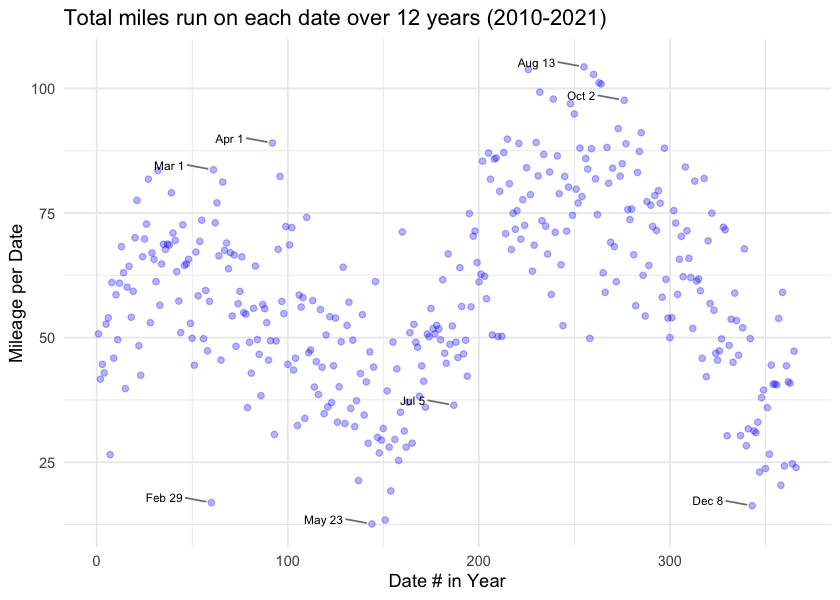

In [21]:
p6b = ggplot(df2d, aes(x=DateOrder,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Date # in Year",y="Mileage per Date",title="Total miles run on each date over 12 years (2010-2021)") +
    geom_text_repel(
            data = df2o,
            nudge_y = 1,
            nudge_x = -15,
            segment.size = .5,
            size = 2.5,
            hjust = 1,
            segment.color = "grey50",
            point.padding = .3,
            aes(x=DateOrder, y=SumMi, label = Mon_DD),
        )
p6b

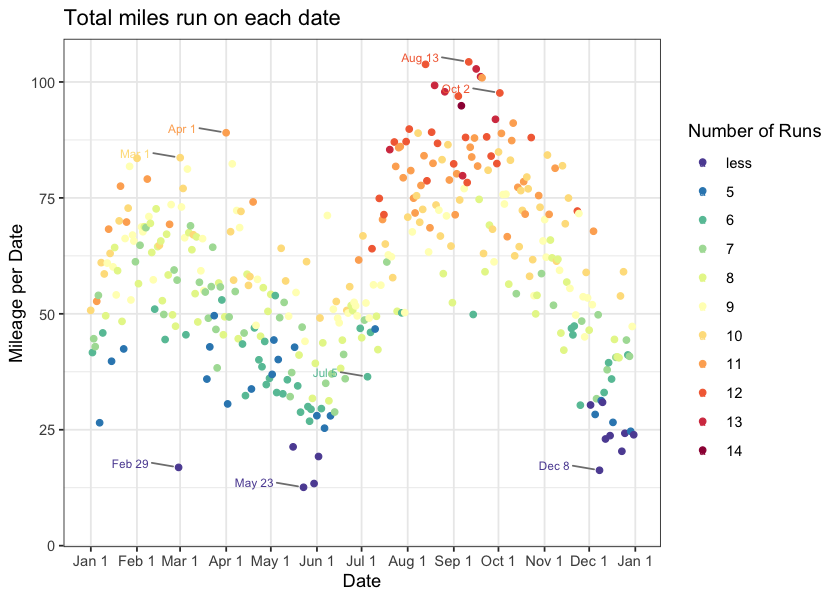

In [22]:
p6c = ggplot(df2d, aes(x=DateOrder,y=SumMi,color=numYear_cat)) +
    geom_point(position=position_jitter(w=.1,h=0),alpha=1) +
    theme_bw() +
    labs(x="Date",y="Mileage per Date",color="Number of Runs",
         title="Total miles run on each date") +
    scale_color_brewer(type="div", palette=9, direction=-1) +
    scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367), 
                       labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                                "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                       minor_breaks=NULL) +
    scale_y_continuous(limits=c(0,max(df2d$SumMi)+5), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
    coord_cartesian(ylim=c(4.67,max(df2d$SumMi))) +
    geom_text_repel(
            data = df2o,
            nudge_y = 1,
            nudge_x = -20,
            segment.size = .5,
            size = 2.5,
            hjust = 1,
            segment.color = "grey50",
            point.padding = .3,
            aes(x=DateOrder, y=SumMi, label = Mon_DD),
        )
p6c

In [23]:
df2e %>% select("MMDD","numYear","SumMi") %>% arrange(-SumMi) %>% head(20)

MMDD,numYear,SumMi
<chr>,<dbl>,<dbl>
9/11,12,104.33
8/13,12,103.80
9/16,13,102.81
9/19,13,101.13
9/20,11,100.90
8/19,13,99.26
8/26,13,97.88
10/2,12,97.63
9/4,12,96.94


In [24]:
df2e %>% select("MMDD","numYear","SumMi") %>% arrange(-SumMi) %>% tail(10)

MMDD,numYear,SumMi
<chr>,<dbl>,<dbl>
12/31,4,23.92
12/15,4,23.73
12/12,4,23.01
5/16,4,21.31
12/23,4,20.36
6/2,4,19.23
2/29,2,16.88
12/8,3,16.26
5/30,3,13.40


In [25]:
df2e %>%
    group_by(Month) %>%
    arrange(-SumMi) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi,rk
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
9/11,9,11,255,12,12,104.33,1
8/13,8,13,226,12,12,103.80,1
10/2,10,2,276,12,12,97.63,1
4/1,4,1,92,11,11,89.05,1
7/31,7,31,213,12,12,87.14,1
11/3,11,3,308,10,10,84.24,1
3/1,3,1,61,10,10,83.67,1
2/1,2,1,32,10,10,83.54,1
1/27,1,27,27,9,9,81.80,1


In [26]:
df2e %>%
    group_by(Month) %>%
    arrange(SumMi) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi,rk
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
5/23,5,23,144,3,less,12.59,1
12/8,12,8,343,3,less,16.26,1
2/29,2,29,60,2,less,16.88,1
6/2,6,2,154,4,less,19.23,1
1/7,1,7,7,5,5,26.51,1
11/25,11,25,330,6,6,30.30,1
4/2,4,2,93,5,5,30.57,1
3/19,3,19,79,5,5,35.93,1
7/5,7,5,187,6,6,36.43,1


In [27]:
df2e %>%
    group_by(Month) %>%
    summarize(mean = mean(SumMi))

Month,mean
<dbl>,<dbl>
1,57.22355
2,61.50414
3,58.01065
4,52.92500
5,39.73419
6,43.61300
7,62.20645
8,77.49226
9,81.49233


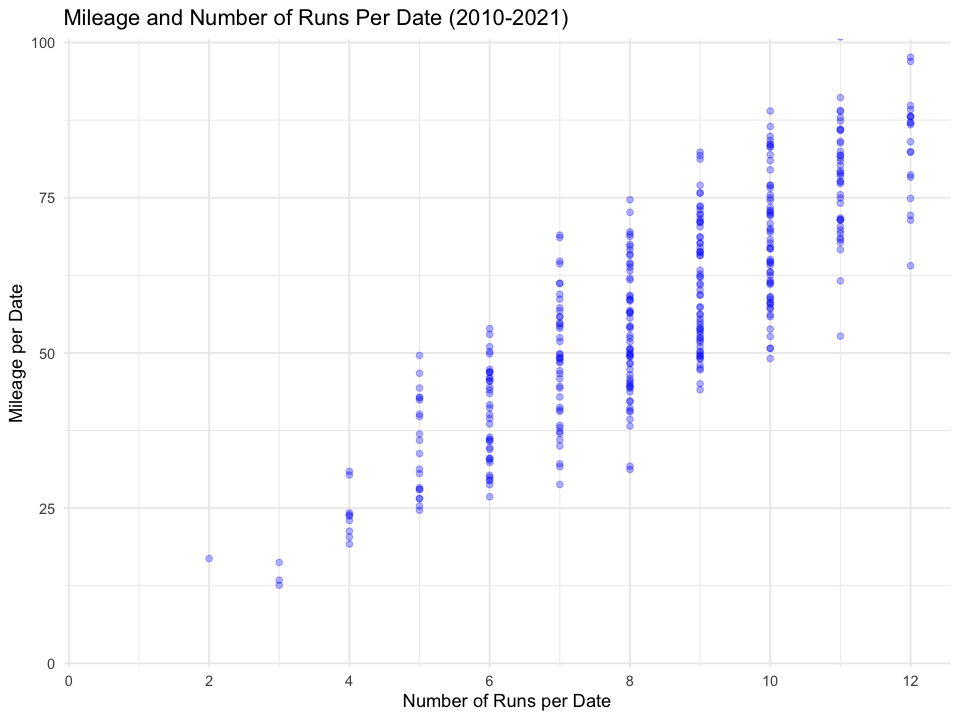

In [28]:
options(repr.plot.height=6, repr.plot.width=8)
p7 = ggplot(df2d, aes(x=numYear,y=SumMi)) +
    geom_point(alpha=.3,color="blue") +
    theme_minimal() +
    labs(x="Number of Runs per Date",y="Mileage per Date",title="Mileage and Number of Runs Per Date (2010-2021)") +
    theme(legend.position="top") +
    coord_cartesian(ylim=c(4,96),xlim=c(.5,12)) +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p7

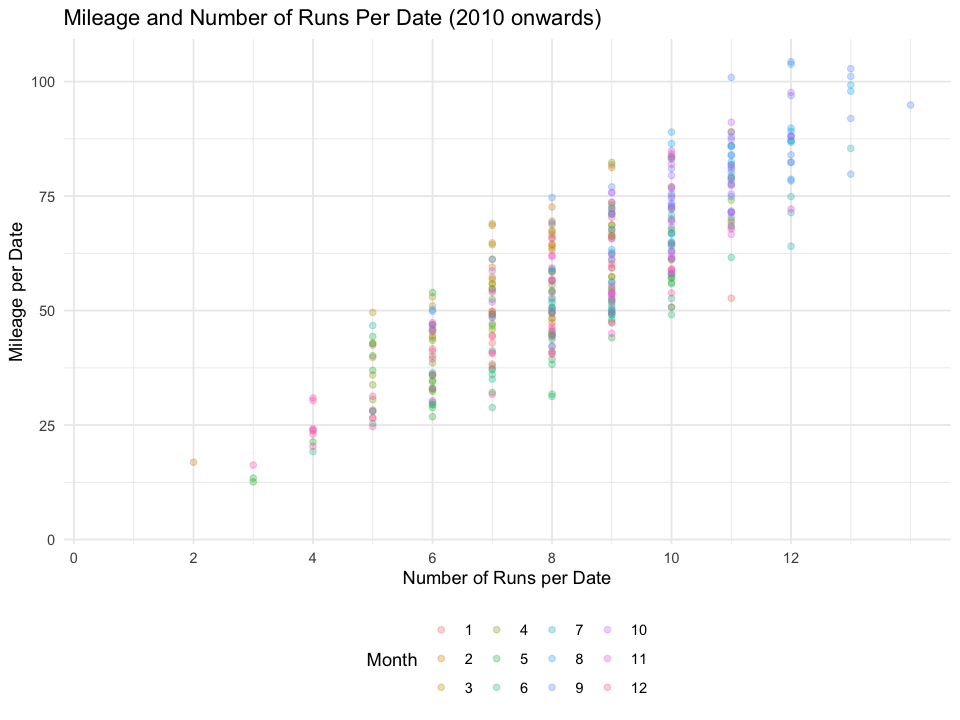

In [29]:
options(repr.plot.height=6, repr.plot.width=8)
p7a = ggplot(df2d, aes(x=numYear,y=SumMi,color=as.factor(Month))) +
    geom_point(alpha=.3) +
    theme_minimal() +
    labs(x="Number of Runs per Date",y="Mileage per Date",title="Mileage and Number of Runs Per Date (2010 onwards)",
        color="Month") +
    theme(legend.position="bottom") +
    coord_cartesian(ylim=c(4,max(df2d$SumMi)),xlim=c(.5,max(df2d$numYear))) +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p7a

In [30]:
head(df2e)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1/1,1,1,1,10,10,50.75
1/2,1,2,2,6,6,41.65
1/3,1,3,3,7,7,44.63
1/4,1,4,4,7,7,42.92
1/5,1,5,5,11,11,52.70
1/6,1,6,6,7,7,53.98


In [31]:
df2e %>% summarize(mean_mi = mean(SumMi), sd_mi = sd(SumMi), mean_n = mean(numYear), sd_n = sd(numYear))

mean_mi,sd_mi,mean_n,sd_n
<dbl>,<dbl>,<dbl>,<dbl>
58.53872,18.55613,8.527322,2.177863


In [32]:
cor(df2e$numYear, df2e$SumMi)

[1] 0.8590976

In [33]:
cov(df2e$numYear, df2e$SumMi)

[1] 34.71846

In [34]:
df2e %>% 
group_by(Month) %>%
summarize(mean_mi = mean(SumMi), sd_mi = sd(SumMi), mean_n = mean(numYear), sd_n = sd(numYear))

Month,mean_mi,sd_mi,mean_n,sd_n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,57.22355,12.29145,8.483871,1.823385
2,61.50414,12.77535,8.000000,1.690309
3,58.01065,11.97665,7.677419,1.399693
4,52.92500,15.14062,7.866667,1.814374
5,39.73419,12.87497,6.709677,1.883145
6,43.61300,11.81203,7.900000,1.748891
7,62.20645,15.19006,9.354839,2.122081
8,77.49226,11.80719,10.516129,1.287659
9,81.49233,13.44806,10.900000,1.826057


In [35]:
df2e %>%
    filter(Month==10)

MMDD,Month,Day,DateOrder,numYear,numYear_cat,SumMi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
10/1,10,1,275,10,10,84.90
10/2,10,2,276,12,12,97.63
10/3,10,3,277,11,11,88.91
10/4,10,4,278,9,9,75.72
10/5,10,5,279,9,9,73.68
10/6,10,6,280,9,9,75.80
10/7,10,7,281,11,11,66.63
10/8,10,8,282,8,8,56.40
10/9,10,9,283,10,10,83.13


In [36]:
png("rpd.png", width=1200, height=800)
ggplot(df2d, aes(x=DateOrder,y=SumMi,color=numYear_cat)) +
    geom_point(position=position_jitter(w=.1,h=0),alpha=1,size=4.5) +
    theme_bw() +
    labs(x="Date",y="Mileage per Date",color="Number of Runs",
         title="Total miles run on each date over 12 years (2010 onwards)") +
    scale_color_brewer(type="div", palette=9, direction=-1) +
    scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367), 
                       labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                                "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                       minor_breaks=NULL) +
    scale_y_continuous(limits=c(0,max(df2d$SumMi)+5), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
    coord_cartesian(ylim=c(4.67,max(df2d$SumMi))) +
    theme(text = element_text(size = 24)) +
    # geom_text_repel(
    #         data = df2o,
    #         nudge_y = 1,
    #         nudge_x = -20,
    #         segment.size = 1,
    #         size = 8,
    #         hjust = 1,
    #         segment.color = "grey50",
    #         point.padding = .3,
    #         aes(x=DateOrder, y=SumMi, label = Mon_DD),
    #     ) +
    guides(color = guide_legend(override.aes = list(size = 4.5)))
dev.off()

pdf 
  2

In [37]:
df2d %>% head(10)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder,SumMi,numYear_cat
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2024-01-01,3.11,0:23:16,7.481243,2024,1,1,1/1,10,1,1,1,10,1,50.75,10
2022-01-02,7.07,0:51:00,7.213579,2022,1,2,1/2,6,1,1,1,6,2,41.65,6
2023-01-03,6.43,0:47:02,7.314671,2023,1,3,1/3,8,1,1,1,7,3,44.63,7
2021-01-04,7.00,0:53:48,7.685714,2021,1,4,1/4,7,1,1,1,7,4,42.92,7
2024-01-05,3.11,0:21:22,6.870311,2024,1,5,1/5,11,1,1,1,11,5,52.70,11
2023-01-06,9.08,1:06:09,7.285242,2023,1,6,1/6,7,1,1,1,7,6,53.98,7
2021-01-07,8.00,1:06:54,8.362500,2021,1,7,1/7,5,1,1,1,5,7,26.51,5
2024-01-08,5.04,0:36:03,7.152778,2024,1,8,1/8,10,1,1,1,10,8,61.04,10
2021-01-09,11.12,1:17:22,6.957434,2021,1,9,1/9,6,1,1,1,6,9,45.88,6


In [38]:
df3 <- df %>% 
    mutate(weekday = weekdays(Date))
df3$weekday <- fct_relevel(df3$weekday, "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
df3 %>% tail(20)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,weekday
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2021-12-28,6.00,0:44:51,7.475000,2021,12,28,12/28,6,0,1,1,6,Tuesday
2022-12-28,6.59,0:48:41,7.387456,2022,12,28,12/28,7,1,1,1,7,Wednesday
2011-12-29,4.20,0:30:58,7.373016,2011,12,29,12/29,1,0,1,1,1,Thursday
2014-12-29,3.50,0:24:08,6.895238,2014,12,29,12/29,2,0,1,1,2,Monday
2016-12-29,7.00,0:50:35,7.226190,2016,12,29,12/29,3,0,1,1,3,Thursday
2017-12-29,7.10,0:53:16,7.502347,2017,12,29,12/29,4,0,1,1,4,Friday
2018-12-29,2.87,NA,NA,2018,12,29,12/29,5,1,1,1,5,Saturday
2010-12-30,5.10,0:42:42,8.372549,2010,12,30,12/30,1,0,1,1,1,Thursday
2011-12-30,6.10,0:49:18,8.081967,2011,12,30,12/30,2,0,1,1,2,Friday


In [39]:
df3 %>% 
    group_by(weekday) %>%
    summarize(miles = sum(Mileage),
              n_runs = n()) %>%
    arrange(-miles)

weekday,miles,n_runs
<fct>,<dbl>,<int>
Saturday,3560.16,514
Wednesday,3314.31,492
Tuesday,3226.52,536
Friday,3132.80,539
Thursday,3019.22,511
Sunday,2785.62,355
Monday,2386.54,412


In [40]:
df3 %>% 
    filter(Year==2024) %>%
    group_by(weekday) %>%
    summarize(miles = sum(Mileage),
              n_runs = n()) %>%
    arrange(-miles)

weekday,miles,n_runs
<fct>,<dbl>,<int>
Saturday,310.91,26
Wednesday,176.61,27
Friday,151.33,27
Monday,132.95,25
Tuesday,130.36,23
Thursday,83.86,15
Sunday,15.96,3


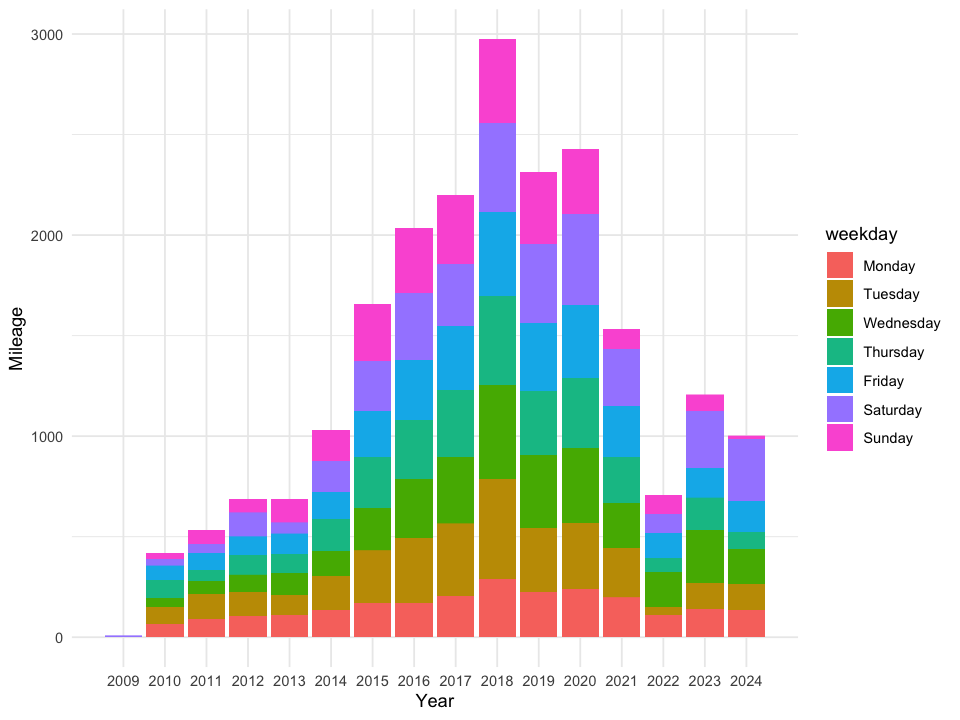

In [41]:
p8 = ggplot(df3, aes(x=Year, y=Mileage, fill=weekday)) +
    geom_col(position=position_stack(reverse=TRUE)) +
    theme_minimal() +
    scale_x_continuous(breaks=seq(from=2009,to=2024,by=1),minor_breaks=NULL)
p8

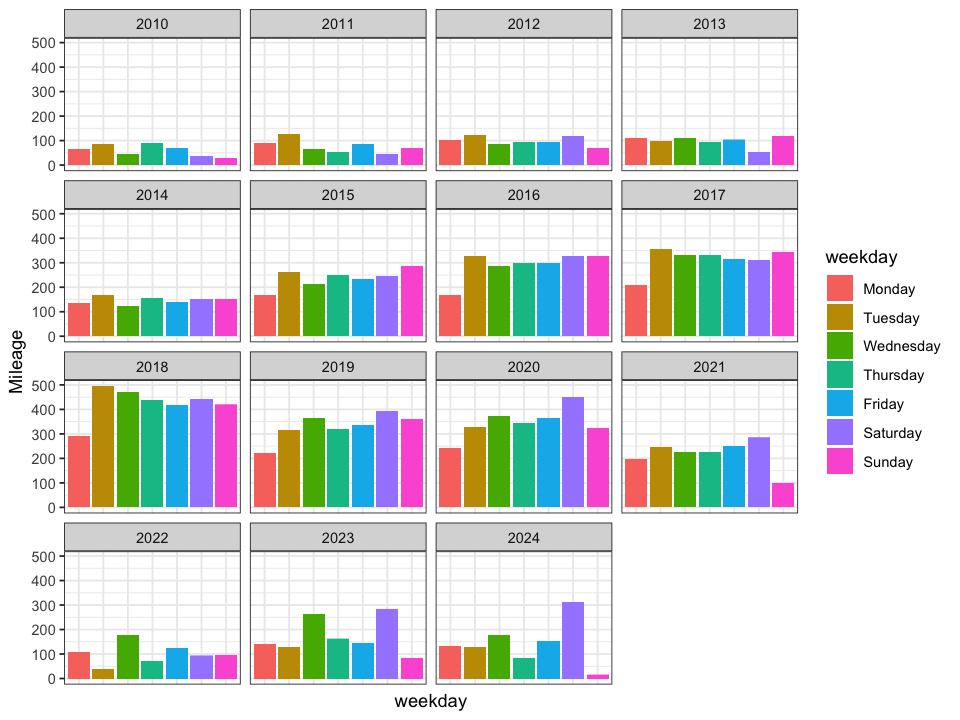

In [42]:
p8a = ggplot(data = df3 %>% filter(Year >= 2010 & Year <= 2024), 
             mapping = aes(x=weekday, y=Mileage, fill=weekday)) +
    geom_col() +
    theme_bw() +
    facet_wrap(~Year) +
    scale_x_discrete(labels=NULL) +
    theme(axis.ticks.x=element_blank())
p8a

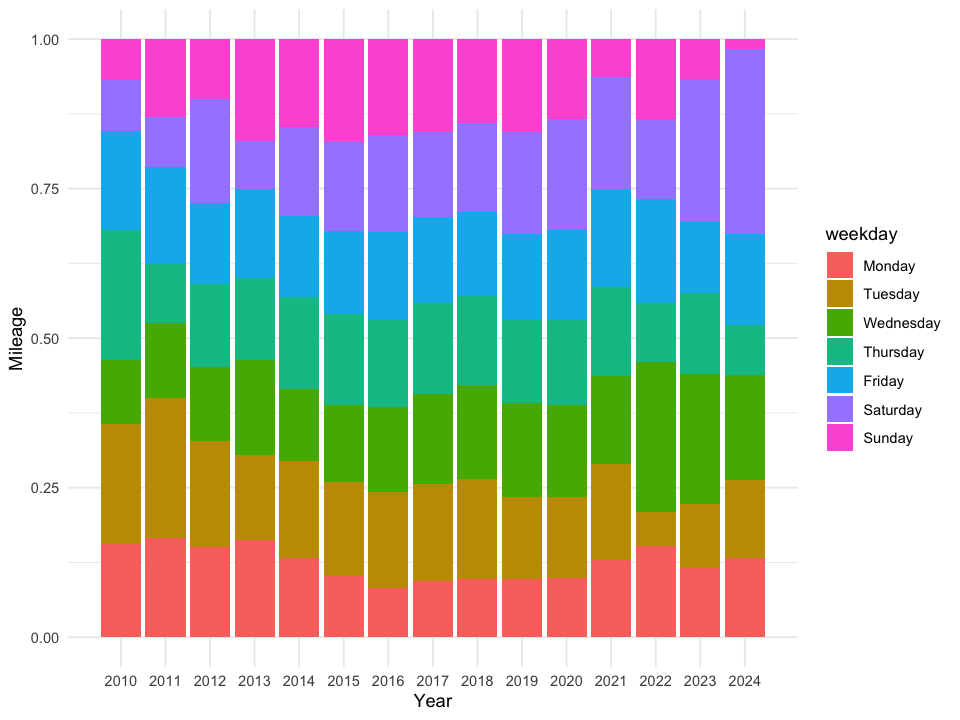

In [43]:
p8b = ggplot(data = df3 %>% filter(Year >= 2010), 
             mapping = aes(x=Year, y=Mileage, fill=weekday)) +
    geom_col(position=position_fill(reverse=TRUE)) +
    theme_minimal() +
    scale_x_continuous(breaks=seq(from=2010,to=2024,by=1),minor_breaks=NULL)
p8b